The gaming industry is certainly one of the thriving industries of the modern age and one of those that are most influenced by the advancement in technology. With the availability of technologies like AR/VR in consumer products like gaming consoles and even smartphones, the gaming sector shows great potential. In this hackathon, you as a data scientist must use your analytical skills to predict the sales of video games depending on given factors. Given are 8 distinguishing factors that can influence the sales of a video game. Your objective as a data scientist is to build a machine learning model that can accurately predict the sales in millions of units for a given game.

In [1]:
import numpy as np  
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/video-games-sales-prediction/Sample_Submission.csv
/kaggle/input/video-games-sales-prediction/Test.csv
/kaggle/input/video-games-sales-prediction/Train.csv


In [2]:
train = pd.read_csv('/kaggle/input/video-games-sales-prediction/Train.csv')
test = pd.read_csv('/kaggle/input/video-games-sales-prediction/Test.csv')
sub = pd.read_csv('/kaggle/input/video-games-sales-prediction/Sample_Submission.csv')

In [3]:
train.shape, test.shape, sub.shape

((3506, 9), (1503, 8), (1503, 1))

In [4]:
train.head(5)

,ID,CONSOLE,YEAR,CATEGORY,PUBLISHER,RATING,CRITICS_POINTS,USER_POINTS,SalesInMillions
0,2860,ds,2008,role-playing,Nintendo,E,2.833333,0.303704,1.779257
1,731,wii,2012,simulation,Konami Digital Entertainment,E10+,13.200000,1.640000,0.215050
2,495,pc,2019,shooter,Activision,M,4.562500,0.006410,0.534402
3,2641,ps2,2002,sports,Electronic Arts,E,4.181818,0.326923,1.383964
4,811,ps3,2013,action,Activision,M,2.259259,0.032579,0.082671


In [5]:
train.isnull().sum()

ID                 0
CONSOLE            0
YEAR               0
CATEGORY           0
PUBLISHER          0
RATING             0
CRITICS_POINTS     0
USER_POINTS        0
SalesInMillions    0
dtype: int64

In [6]:
train.nunique()

ID                 2654
CONSOLE              17
YEAR                 23
CATEGORY             12
PUBLISHER           204
RATING                6
CRITICS_POINTS     1683
USER_POINTS        2187
SalesInMillions    3506
dtype: int64

In [7]:
test.nunique()

ID                1334
CONSOLE             17
YEAR                25
CATEGORY            12
PUBLISHER          136
RATING               5
CRITICS_POINTS     995
USER_POINTS       1110
dtype: int64

In [8]:
sub.head()

,SalesInMillions
0,1.497533
1,2.368795
2,2.630505
3,2.506086
4,1.970574


# Uni-variate Analysis

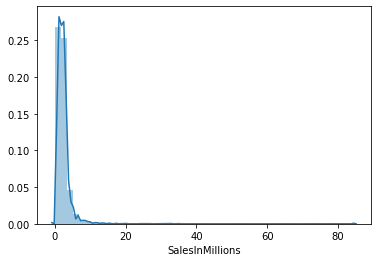

In [9]:
sns.distplot(train['SalesInMillions']);

In [10]:
# 7th Gen: Playstation 3 vs XBOX360 vs Nintendo Wii
# 8th Gen: Playstation 4 vs XBOXONE vs Nintendo WiiU

In [11]:
train['CONSOLE'].value_counts()

ps2     585
x360    448
ps3     438
pc      315
x       266
wii     254
ds      246
psp     180
gc      164
gba     129
ps4     121
xone     85
3ds      84
ps       83
psv      59
wiiu     45
dc        4
Name: CONSOLE, dtype: int64

In [12]:
import matplotlib.style as style
style.available
style.use('bmh')

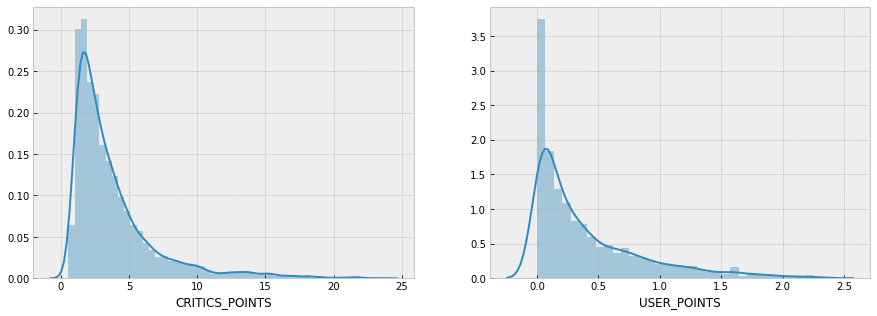

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
sns.distplot(train['CRITICS_POINTS'], ax=ax1)
sns.distplot(train['USER_POINTS'], ax=ax2);

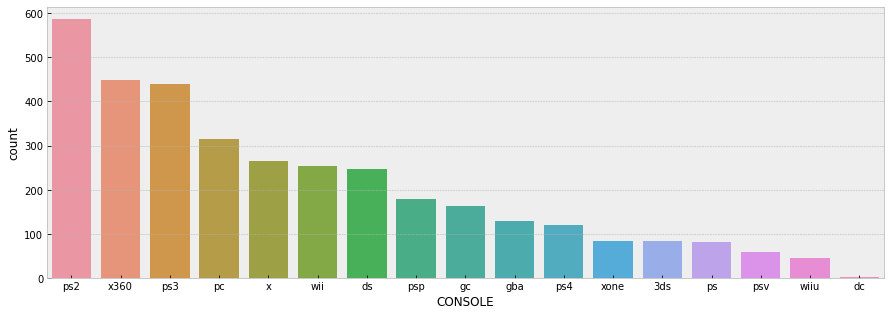

In [14]:
plt.figure(figsize=(15,5))
sns.countplot(train['CONSOLE'], order=train['CONSOLE'].value_counts().index);

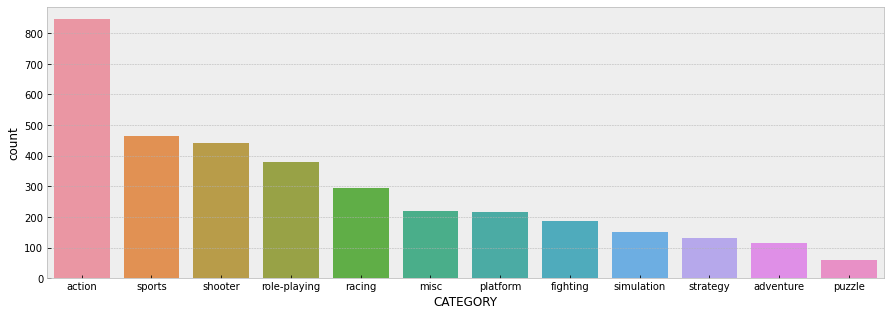

In [15]:
plt.figure(figsize=(15,5))
sns.countplot(train['CATEGORY'], order=train['CATEGORY'].value_counts().index);

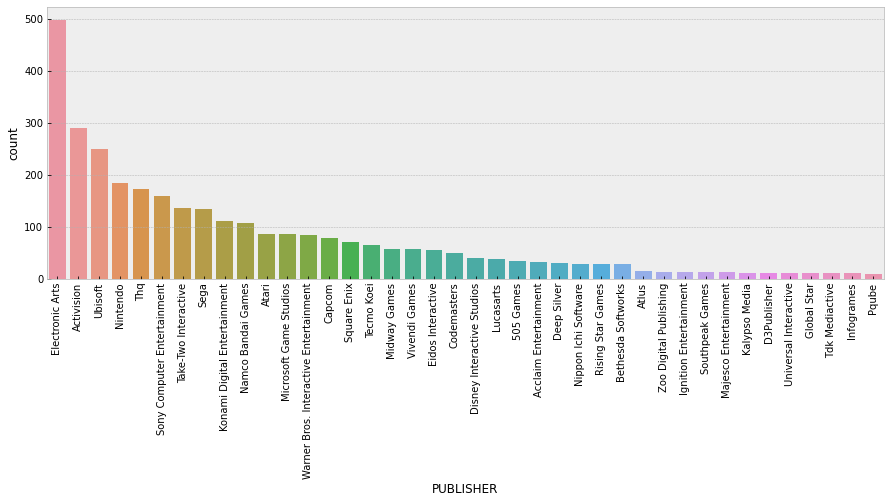

In [16]:
plt.figure(figsize=(15,5))
sns.countplot(train['PUBLISHER'], order=train['PUBLISHER'].value_counts().iloc[:40].index)
plt.xticks(rotation=90);

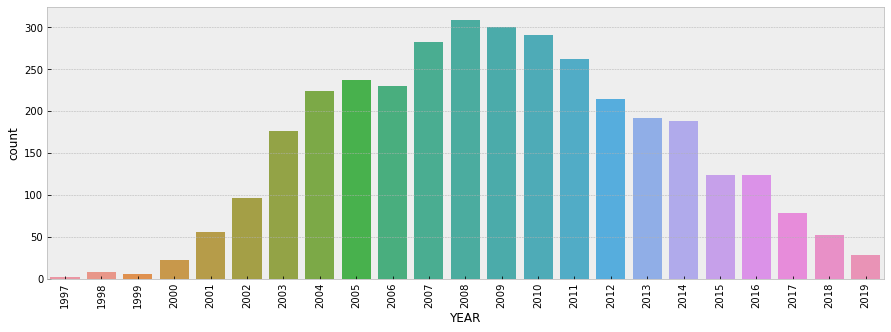

In [17]:
plt.figure(figsize=(15,5))
sns.countplot(train['YEAR'])
plt.xticks(rotation=90);

# Bi-variate Analysis

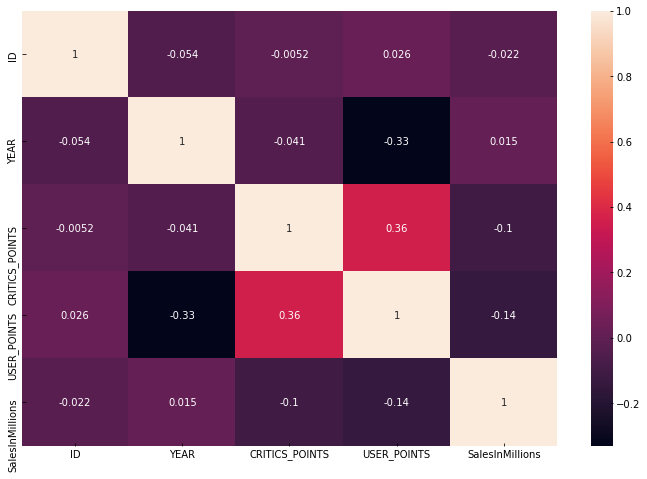

In [18]:
plt.figure(figsize=(12, 8))

train_corr = train.corr()
sns.heatmap(train_corr, 
            xticklabels = train_corr.columns.values,
            yticklabels = train_corr.columns.values,
            annot = True);

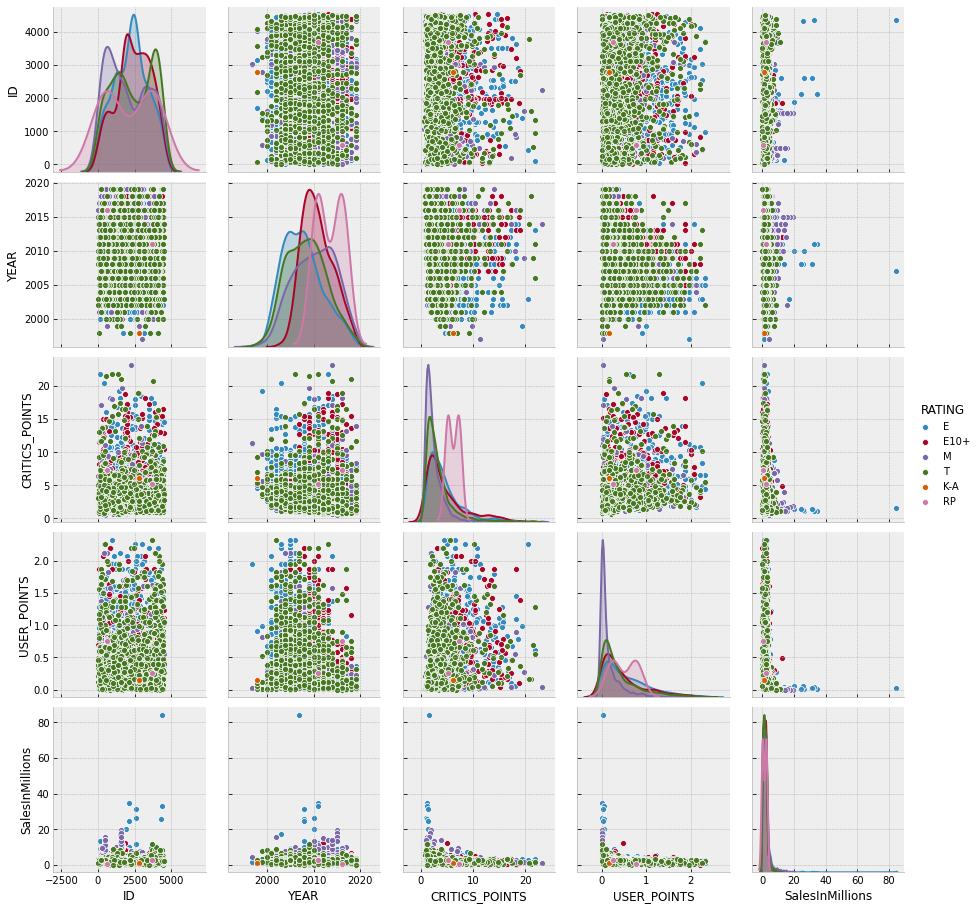

In [19]:
sns.pairplot(train, hue='RATING', diag_kind='kde');

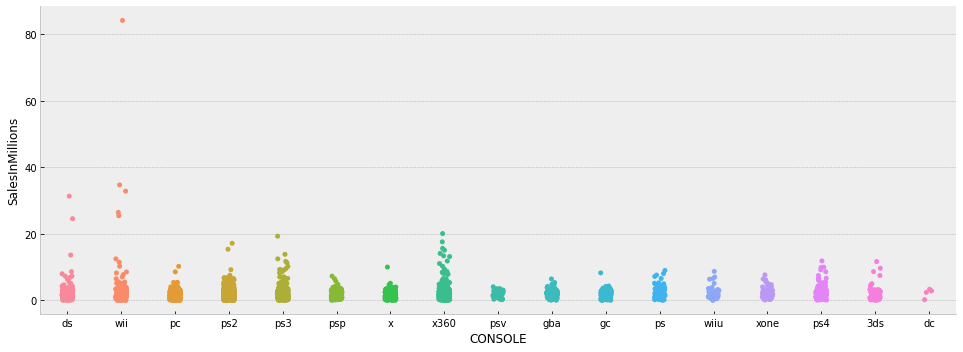

In [20]:
g = sns.catplot(x="CONSOLE", y="SalesInMillions", data=train);
g.fig.set_size_inches(15,5)

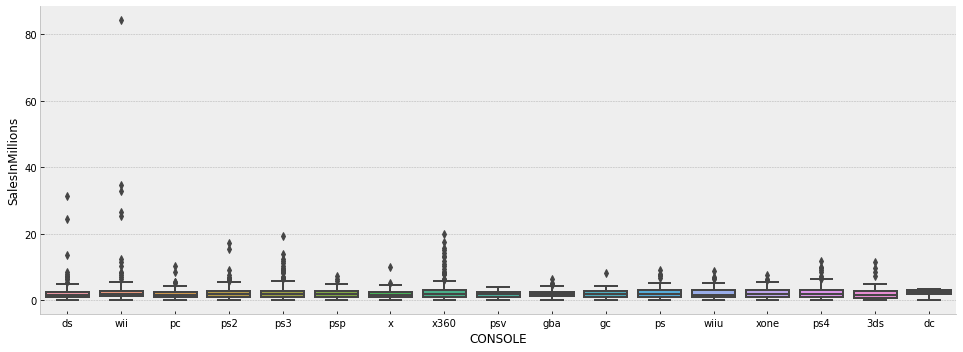

In [21]:
g = sns.catplot(x="CONSOLE", y="SalesInMillions", kind="box", data=train)
g.fig.set_size_inches(15,5);

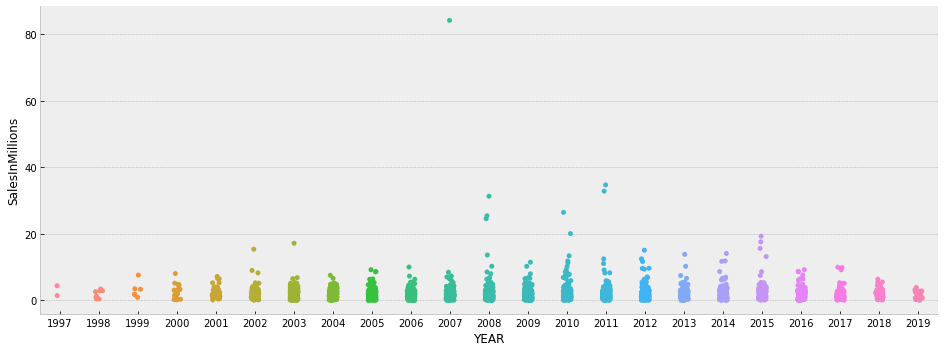

In [22]:
g = sns.catplot(x="YEAR", y="SalesInMillions", data=train)
g.fig.set_size_inches(15,5);

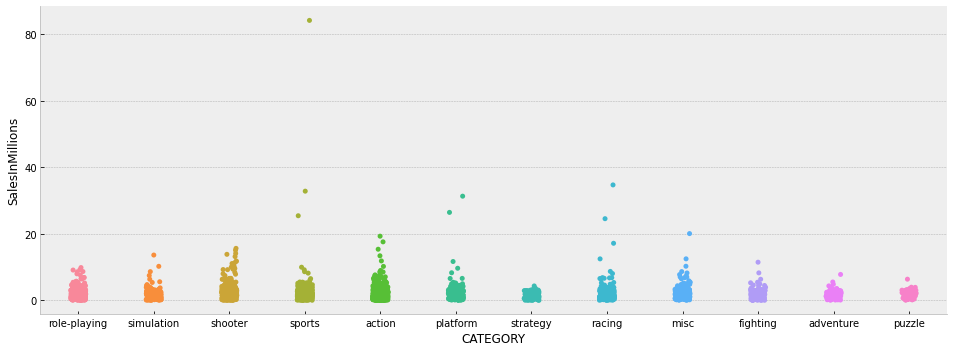

In [23]:
g = sns.catplot(x="CATEGORY", y="SalesInMillions", data=train)
g.fig.set_size_inches(15,5);

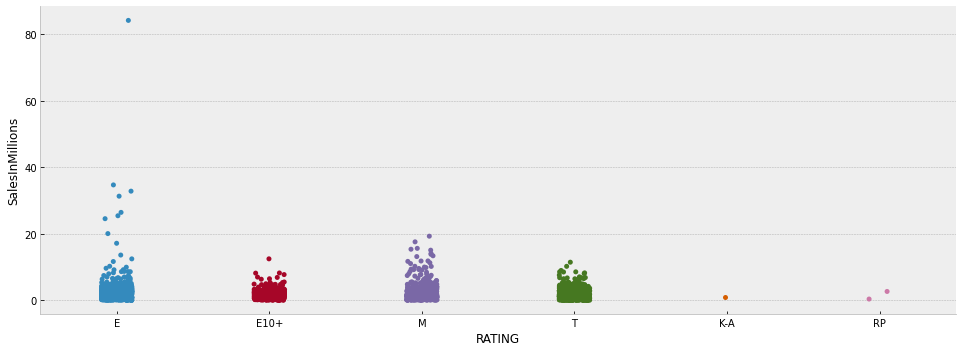

In [24]:
g = sns.catplot(x="RATING", y="SalesInMillions", data=train)
g.fig.set_size_inches(15,5);

In [25]:
train['RATING'].value_counts()

T       1182
E       1061
M        749
E10+     511
RP         2
K-A        1
Name: RATING, dtype: int64

In [26]:
test['RATING'].value_counts()

T       530
E       457
M       321
E10+    194
AO        1
Name: RATING, dtype: int64

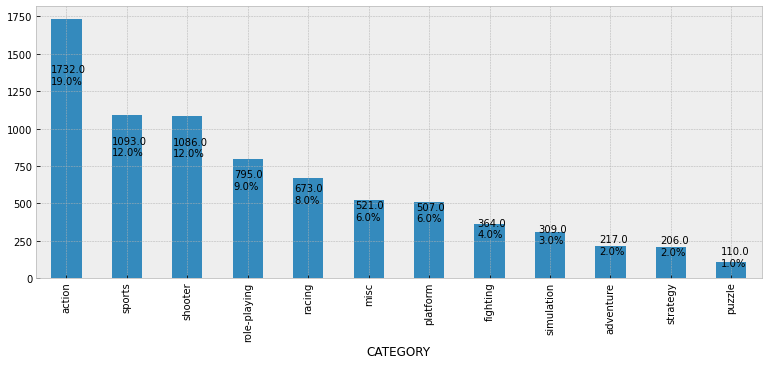

In [27]:
# Category Total Sales
x = train.groupby(['CATEGORY']).sum().copy()
ax = x['SalesInMillions'].sort_values(ascending=False).plot(kind='bar', figsize=(13, 5));

for p in ax.patches:
    ax.annotate(str( round( p.get_height() ) ) + "\n" + str(round( p.get_height() /89.170) )+ "%", 
                (p.get_x() * 1.007, p.get_height() * 0.75),
                color='black')

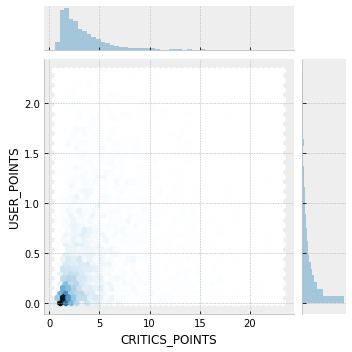

In [28]:
sns.jointplot(x='CRITICS_POINTS',y='USER_POINTS',data=train, kind='hex', size=5);

# Feature Engineering & Pre-processing

In [29]:
train = train[train['RATING'] != 'RP']
train = train[train['RATING'] != 'K-A']

In [30]:
train = train[train['SalesInMillions'] < 30]

In [31]:
df = train.append(test,ignore_index=True)
df.shape

(5002, 9)

In [32]:
df.head(3)

,ID,CONSOLE,YEAR,CATEGORY,PUBLISHER,RATING,CRITICS_POINTS,USER_POINTS,SalesInMillions
0,2860,ds,2008,role-playing,Nintendo,E,2.833333,0.303704,1.779257
1,731,wii,2012,simulation,Konami Digital Entertainment,E10+,13.200000,1.640000,0.215050
2,495,pc,2019,shooter,Activision,M,4.562500,0.006410,0.534402


In [33]:
agg_func = {
    'CRITICS_POINTS': ['mean','min','max','sum'],
    'USER_POINTS': ['mean','min','max','sum']
}
agg_func = df.groupby('CONSOLE').agg(agg_func)
agg_func.columns = [ 'CONSOLE_' + ('_'.join(col).strip()) for col in agg_func.columns.values]
agg_func.reset_index(inplace=True)
df = df.merge(agg_func, on=['CONSOLE'], how='left')

agg_func = {
    'CRITICS_POINTS': ['mean','min','max','sum'],
    'USER_POINTS': ['mean','min','max','sum']
}
agg_func = df.groupby('CATEGORY').agg(agg_func)
agg_func.columns = [ 'CATEGORY_' + ('_'.join(col).strip()) for col in agg_func.columns.values]
agg_func.reset_index(inplace=True)
df = df.merge(agg_func, on=['CATEGORY'], how='left')

agg_func = {
    'CRITICS_POINTS': ['mean','min','max','sum'],
    'USER_POINTS': ['mean','min','max','sum']
}
agg_func = df.groupby('PUBLISHER').agg(agg_func)
agg_func.columns = [ 'PUBLISHER_' + ('_'.join(col).strip()) for col in agg_func.columns.values]
agg_func.reset_index(inplace=True)
df = df.merge(agg_func, on=['PUBLISHER'], how='left')

agg_func = {
    'CRITICS_POINTS': ['mean','min','max','sum'],
    'USER_POINTS': ['mean','min','max','sum']
}
agg_func = df.groupby('RATING').agg(agg_func)
agg_func.columns = [ 'RATING_' + ('_'.join(col).strip()) for col in agg_func.columns.values]
agg_func.reset_index(inplace=True)
df = df.merge(agg_func, on=['RATING'], how='left')

In [34]:
#df['Old'] = 2020 - df['YEAR']

In [35]:
df['Unique_CATEGORY_per_CONSOLE'] = df.groupby(['CONSOLE'])['CATEGORY'].transform('nunique')

In [36]:
calc = df.groupby(['CONSOLE'], axis=0).agg({'CONSOLE':[('op1', 'count')]}).reset_index() 
calc.columns = ['CONSOLE','CONSOLE Count']
df = df.merge(calc, on=['CONSOLE'], how='left')

calc = df.groupby(['CATEGORY'], axis=0).agg({'CATEGORY':[('op1', 'count')]}).reset_index() 
calc.columns = ['CATEGORY','CATEGORY Count']
df = df.merge(calc, on=['CATEGORY'], how='left')

calc = df.groupby(['PUBLISHER'], axis=0).agg({'PUBLISHER':[('op1', 'count')]}).reset_index() 
calc.columns = ['PUBLISHER','PUBLISHER Count']
df = df.merge(calc, on=['PUBLISHER'], how='left')

calc = df.groupby(['RATING'], axis=0).agg({'RATING':[('op1', 'count')]}).reset_index() 
calc.columns = ['RATING','RATING Count']
df = df.merge(calc, on=['RATING'], how='left')

In [37]:
for c in ['CONSOLE', 'CATEGORY', 'PUBLISHER', 'RATING']:
    df[c] = df[c].astype('category')

In [38]:
agg_func = {
    'CRITICS_POINTS': ['mean','sum'],
    'USER_POINTS': ['mean','sum']
}
agg_func = df.groupby(['YEAR','CONSOLE']).agg(agg_func)
agg_func.columns = [ 'YEAR_CONSOLE_' + ('_'.join(col).strip()) for col in agg_func.columns.values]
agg_func.reset_index(inplace=True)
df = df.merge(agg_func, on=['YEAR','CONSOLE'], how='left')

In [39]:
#df.drop(['ID'], axis=1, inplace=True)

In [40]:
df = pd.get_dummies(df, columns=['CONSOLE', 'CATEGORY', 'PUBLISHER', 'RATING'], drop_first=True)

In [41]:
train_df = df[df['SalesInMillions'].isnull()!=True]
test_df = df[df['SalesInMillions'].isnull()==True]
test_df.drop(['SalesInMillions'], axis=1, inplace=True)

train_df.shape, test_df.shape

((3499, 308), (1503, 307))

# Modelling

In [42]:
X = train_df.drop(labels=['SalesInMillions'], axis=1)
y = train_df['SalesInMillions'].values

X.shape, y.shape

((3499, 307), (3499,))

In [43]:
X.head(3)

,ID,YEAR,CRITICS_POINTS,USER_POINTS,CONSOLE_CRITICS_POINTS_mean,CONSOLE_CRITICS_POINTS_min,CONSOLE_CRITICS_POINTS_max,CONSOLE_CRITICS_POINTS_sum,CONSOLE_USER_POINTS_mean,CONSOLE_USER_POINTS_min,...,PUBLISHER_Xs Games,PUBLISHER_Xseed Games,PUBLISHER_Yacht Club Games,PUBLISHER_Zoo Digital Publishing,PUBLISHER_Zoo Games,PUBLISHER_Zushi Games,RATING_E,RATING_E10+,RATING_M,RATING_T
0,2860,2008,2.833333,0.303704,4.440908,1.014286,21.75,1501.026761,0.629334,0.018495,...,0,0,0,0,0,0,1,0,0,0
1,731,2012,13.200000,1.640000,4.321977,0.873418,19.00,1573.199807,0.511942,0.004006,...,0,0,0,0,0,0,0,1,0,0
2,495,2019,4.562500,0.006410,4.120763,0.846154,20.50,1891.430309,0.115444,0.000341,...,0,0,0,0,0,0,0,0,1,0


In [44]:
from math import sqrt 
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.model_selection import KFold
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [45]:
Xtest = test_df

In [46]:
errxgb = []
y_pred_totxgb = []

fold = KFold(n_splits=10, shuffle=True, random_state=42)

for train_index, test_index in fold.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    xgb = XGBRegressor(random_state=42, learning_rate=0.1, subsample=0.8, max_depth=6)
    xgb.fit(X_train, y_train)

    y_pred_xgb = xgb.predict(X_test)
    print("RMSE XGB: ", sqrt(mean_squared_error(y_test, y_pred_xgb)))

    errxgb.append(sqrt(mean_squared_error(y_test, y_pred_xgb)))
    p = xgb.predict(Xtest)
    y_pred_totxgb.append(p)

print('\nMean RMSE', np.mean(errxgb,0))

RMSE XGB:  1.344657220677144
RMSE XGB:  1.2491775359028288
RMSE XGB:  1.7545377126368142
RMSE XGB:  1.6541126973250293
RMSE XGB:  1.4014572114754438
RMSE XGB:  1.5048493579004205
RMSE XGB:  1.4132108008954125
RMSE XGB:  1.5217515510039412
RMSE XGB:  1.5056768942234764
RMSE XGB:  2.143865251803615

Mean RMSE 1.5493296233844127


In [47]:
final_xgb = np.mean(y_pred_totxgb,0)

In [48]:
sub['SalesInMillions'] = final_xgb

In [49]:
sub.head()

,SalesInMillions
0,1.710947
1,2.353118
2,3.578373
3,2.336689
4,1.580740


In [50]:
sub.to_csv('Submission.csv', index=False)